In [2]:
#Code to compute the internal energy change during impulsive encounter along straight orbit

#Computes and plots both non-perturbative and tidal limit \Delta E_{int} vs truncation radius 
#for different impact parameters

#-------Created by Uddipan Banik-------

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.pylab import *
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import BoxStyle
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from scipy.special import erf as errorfunc
from scipy.special import gamma, factorial
from scipy.signal import argrelextrema 
from matplotlib import cm
from numpy import linalg
import time
import os
import h5py
from straight_functions_spherical_perturber import *

#-----------------------------------------------------------------



In [2]:
#-------Input parameters-------

Nb=3                            #No of points in impact parameter range
bmin=1e-1                       #Minimum impact parameter
bmax=1e1                        #Maximum impact parameter

Nc=100                          #No of truncation radii
Rcmin=1e-1                      #Minimum truncation radius
Rcmax=1e2                       #Maximum truncation radius (>bmin for point perturber)

rp=1e0                          #Perturber scale radius rp in units of rs: 1e-2 -> 1e2
rmax=200                        #Maximum radius for integration over subject profile; should be at least 2 times bmax (>bmin for point perturber)

perturber_flag=2                #perturber_flag: 1: Point mass, 2: Plummer sphere, 4: NFW, 5: Isochrone
subject_flag=2                  #subject_flag: 1: Plummer sphere, 2: Hernquist sphere, 3: NFW


#Integration parameters 

EPSABS0=1e-8                    #Absolute tolerance, default: 1e-8
EPSREL0=1e-8                    #Relative tolerance, default: 1e-8

#-----------------------------------------------------------------

In [3]:
#-------General formalism-------

impact=np.logspace(np.log10(bmin),np.log10(bmax),num=Nb) #Impact parameters
Rc=np.logspace(np.log10(Rcmin),np.log10(Rcmax),num=Nc)   #Truncation radii

E=np.zeros(Nb)                                           #Infinite subject: Total energy change
Etrunc=np.zeros((Nc,Nb))                                 #Truncated subject: Total energy change
Ecm=np.zeros(Nb)                                         #Infinite subject: COM energy change
Ecmtrunc=np.zeros((Nc,Nb))                               #Truncated subject: COM energy change
Eint_trunc=np.zeros((Nc,Nb))                             #Truncated subject: Internal energy change

start=time.time()
for i in range(Nb):   
    E[i]=F(impact[i],rmax,rp,perturber_flag,subject_flag)
    Ecm[i]=Fcm(impact[i],rmax,rp,perturber_flag,subject_flag)
    for j in range(Nc):
        Etrunc[j][i]=F(impact[i],Rc[j],rp,perturber_flag,subject_flag)
        Ecmtrunc[j][i]=Fcm(impact[i],Rc[j],rp,perturber_flag,subject_flag)
        Eint_trunc[j][i]=Etrunc[j][i]-Ecmtrunc[j][i]
        end=time.time()
        print ("%d\t%d\tTime taken: %f s\n" %(i,j,abs(end-start)))
    
Eint=E-Ecm                                               #Infinite subject: Internal energy change

/home/uddipan/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


0	0	Time taken: 1.138217 s

0	1	Time taken: 1.142585 s

0	2	Time taken: 1.146916 s

0	3	Time taken: 1.151331 s

0	4	Time taken: 1.155726 s

0	5	Time taken: 1.159981 s

0	6	Time taken: 1.164199 s

0	7	Time taken: 1.168497 s

0	8	Time taken: 1.172916 s

0	9	Time taken: 1.177569 s

0	10	Time taken: 1.182033 s

0	11	Time taken: 1.186493 s

0	12	Time taken: 1.191112 s

0	13	Time taken: 1.195612 s

0	14	Time taken: 1.200099 s

0	15	Time taken: 1.204677 s

0	16	Time taken: 1.209155 s

0	17	Time taken: 1.213651 s

0	18	Time taken: 1.218170 s

0	19	Time taken: 1.222737 s

0	20	Time taken: 1.227221 s

0	21	Time taken: 1.231701 s

0	22	Time taken: 1.236273 s

0	23	Time taken: 1.240722 s

0	24	Time taken: 1.245475 s

0	25	Time taken: 1.249930 s

0	26	Time taken: 1.254447 s

0	27	Time taken: 1.258841 s

0	28	Time taken: 1.263778 s

0	29	Time taken: 1.268591 s

0	30	Time taken: 1.273351 s

0	31	Time taken: 1.278766 s

0	32	Time taken: 1.283491 s

0	33	Time taken: 1.287908 s

0	34	Time taken: 1.29212

/home/uddipan/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


2	0	Time taken: 37.349174 s

2	1	Time taken: 37.353822 s

2	2	Time taken: 37.358036 s

2	3	Time taken: 37.362692 s

2	4	Time taken: 37.367009 s

2	5	Time taken: 37.371684 s

2	6	Time taken: 37.375938 s

2	7	Time taken: 37.380527 s

2	8	Time taken: 37.384939 s

2	9	Time taken: 37.389466 s

2	10	Time taken: 37.394189 s

2	11	Time taken: 37.398656 s

2	12	Time taken: 37.403390 s

2	13	Time taken: 37.407685 s

2	14	Time taken: 37.412402 s

2	15	Time taken: 37.416694 s

2	16	Time taken: 37.421453 s

2	17	Time taken: 37.425723 s

2	18	Time taken: 37.430373 s

2	19	Time taken: 37.434685 s

2	20	Time taken: 37.439307 s

2	21	Time taken: 37.443841 s

2	22	Time taken: 37.448268 s

2	23	Time taken: 37.453048 s

2	24	Time taken: 37.457358 s

2	25	Time taken: 37.462091 s

2	26	Time taken: 37.466338 s

2	27	Time taken: 37.471032 s

2	28	Time taken: 37.475318 s

2	29	Time taken: 37.479996 s

2	30	Time taken: 37.484270 s

2	31	Time taken: 37.489040 s

2	32	Time taken: 37.493351 s

2	33	Time taken: 37.

In [4]:
#-------Distant tide limit: Gnedin et al. 1999 (extended perturber), Spitzer 1958 (point perturber limit)-------

Etidal=np.zeros((Nc,Nb))                                #Truncated subject: Internal energy change (Distant tide approx.)

for i in range(Nb):
    for j in range(Nc):
        Etidal[j][i]=Ftidal(impact[i],Rc[j],rp,perturber_flag,subject_flag)

/home/uddipan/Documents/PhD_Yale/thesis/impulsive_encounter/codes/NP-impulse/straight_functions_spherical_perturber.py:365: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(J0_integrand,np.log(1+epsinit),np.log(zetamax),args=(b,rp,perturber_flag,),epsabs=EPSABS_plummer,epsrel=EPSREL_plummer)[0]


In [5]:
#-------Writing the data in a file-------

hf = h5py.File('impulsive_straight_orbit_rtrunc_perturber%d_subject%d_%.4f.h5' %(perturber_flag,subject_flag,rp), 'w')
hf.create_dataset('impact', data=impact)
hf.create_dataset('Eint', data=Eint)
hf.create_dataset('Eint_trunc', data=Eint_trunc)
hf.create_dataset('Etidal', data=Etidal)
hf.close()

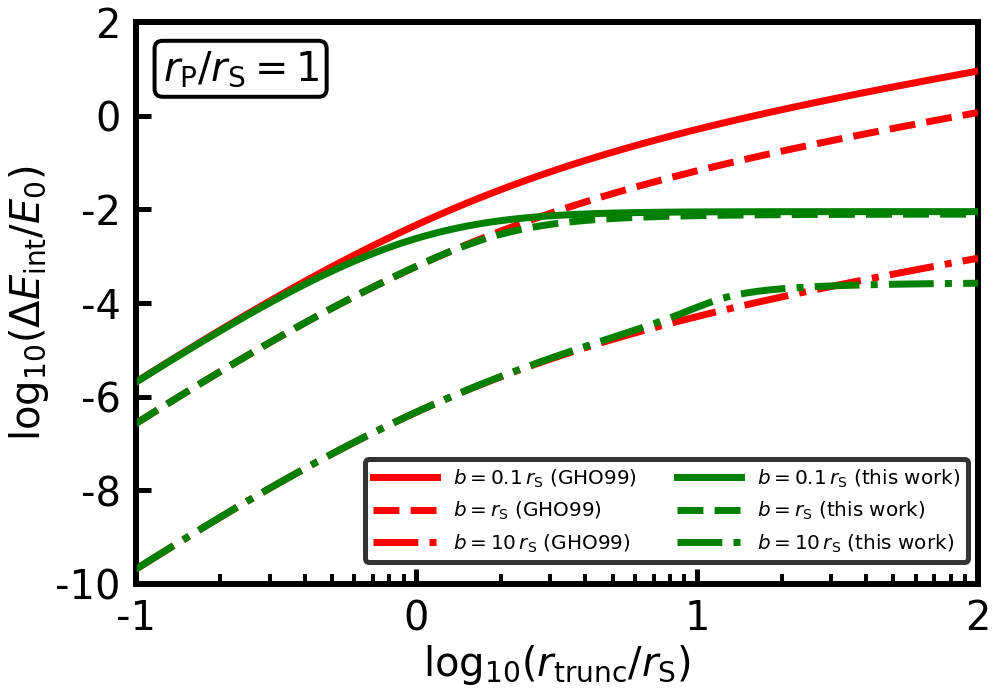

In [7]:
#-------Plots-------

fig,ax=plt.subplots(figsize=(15,10))
plt.subplots_adjust(top=0.95,bottom=0.17,left=0.17,right=0.95)
legend_properties = {'size':25,'weight':'bold'}
trans=1

ax.loglog(Rc,Etidal[:,0],color='r',lw=7,alpha=trans,label='$b=0.1\,r_{\mathrm{S}}$ (GHO99)')
ax.loglog(Rc,Etidal[:,1],color='r',ls='--',lw=7,alpha=trans,label='$b=r_{\mathrm{S}}$ (GHO99)')
ax.loglog(Rc,Etidal[:,2],color='r',ls='-.',lw=7,alpha=trans,label='$b=10\,r_{\mathrm{S}}$ (GHO99)')

ax.loglog(Rc,Eint_trunc[:,0],color='g',lw=7,label='$b=0.1\,r_{\mathrm{S}}$ (this work)')
ax.loglog(Rc,Eint_trunc[:,1],color='g',ls='--',lw=7,label='$b=r_{\mathrm{S}}$ (this work)')
ax.loglog(Rc,Eint_trunc[:,2],color='g',ls='-.',lw=7,label='$b=10\,r_{\mathrm{S}}$ (this work)')

ax.tick_params(which='major', direction='in', width=5, length=15, color='k', pad=15)
ax.tick_params(which='minor', direction='in', width=4, length=10, color='k', pad=15)
ax.set_xticks(np.logspace(np.log10(1e-1),np.log10(1e2),num=4))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.arange((int)(np.log10(1e-1)),(int)(np.log10(1e2)+1))
ax.set_xticklabels(labels)
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks(np.logspace(np.log10(1e-10),np.log10(1e2),num=7))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.arange(-10,3,2)
ax.set_yticklabels(labels)

ax.set_xlim([1e-1,1e2])
ax.set_ylim([1e-10,1e2])
ax.tick_params(labelsize=40)
ax.set_xlabel('$\log_{10}{\left(r_{\mathrm{trunc}}/r_{\mathrm{S}}\\right)}$',fontsize=40)
ax.set_ylabel('$\log_{10}{\left(\Delta E_{\mathrm{int}}/E_0\\right)}$',fontsize=40)
leg=ax.legend(ncol=2,handlelength=3.2,fontsize=20,bbox_to_anchor=[0.63, 0.13],loc='center')
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth('5')
ax.patch.set_edgecolor('k')  
ax.patch.set_linewidth('6')

fig.text(0.195, 0.87, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.0f$' %(rp), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=4, pad=0.2, alpha=1), fontsize=40)

plt.savefig('impulsive_encounter_rtrunc_perturber%d_subject%d_rp%.4f.jpg' %(perturber_flag,subject_flag,rp))
#plt.savefig('impulsive_encounter_rtrunc_perturber%d_subject%d_rp%.4f.eps' %(perturber_flag,subject_flag,rp))

plt.show()